In [3]:
#Problem- 1: Getting Started with Data Exploration

# Load the dataset and display the first 10 rows
import pandas as pd
lol=pd.read_csv("/content/drive/MyDrive/Copy of WHR-2024-5CS037.csv")
lol.head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745


In [ ]:
# 1.2 Number of rows and columns
rows, columns = lol.shape
print(f"The dataset contains {rows} rows and {columns} columns.")

The dataset contains 143 rows and 9 columns.


In [ ]:
# 1.3 List all columns and their data types
print(lol.dtypes)

Country name                     object
score                           float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
dtype: object


In [ ]:
# 1.4  Calculate the mean, median, and standard deviation for the Score column.
score_mean = lol['score'].mean()
score_median = lol['score'].median()
score_std = lol['score'].std()

print(f" Mean: {score_mean}, Median: {score_median}, Standard Deviation: {score_std}")


 Mean: 5.52758041958042, Median: 5.785, Standard Deviation: 1.1707165099442995


In [ ]:
# 1.5 Country with highest and lowest happiness scores
max_score_country = lol.loc[lol['score'].idxmax(), 'Country name']
min_score_country = lol.loc[lol['score'].idxmin(), 'Country name']
print(f"Country with highest score: {max_score_country}")
print(f"Country with lowest score: {min_score_country}")

Country with highest score: Finland
Country with lowest score: Afghanistan


In [5]:
# 1.6 Check for missing values
missing_values = lol.isnull().sum()
print(missing_values)

Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


In [4]:
# 1.7 Filter countries with score > 7.5
filter=lol[lol["score"]>7.5]
filter

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050


In [6]:
sorted_data=filter.sort_values(by="Log GDP per capita", ascending=False)
sorted_data.head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082


In [7]:
def cat_happiness(score):
  if score<4:
    return "Low"
  elif score>=4 and score<=6:
    return "Medium"
  else:
    return "High"
lol["Happiness_Category"]=lol["score"].apply(cat_happiness)
lol.head()

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness_Category
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082,High
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881,High
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050,High
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658,High
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298,High


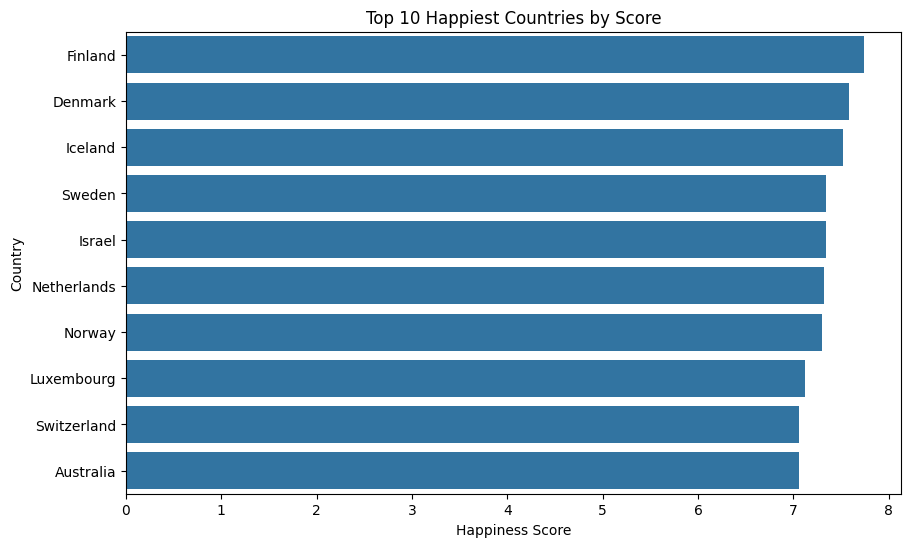

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
lol=pd.read_csv("/content/drive/MyDrive/Copy of WHR-2024-5CS037.csv")
# Bar Plot: Top 10 happiest countries
plt.figure(figsize=(10, 6))
top_10_happiest = lol.nlargest(10, 'score')
sns.barplot(x='score', y='Country name', data=top_10_happiest, )
plt.title('Top 10 Happiest Countries by Score')
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.show()

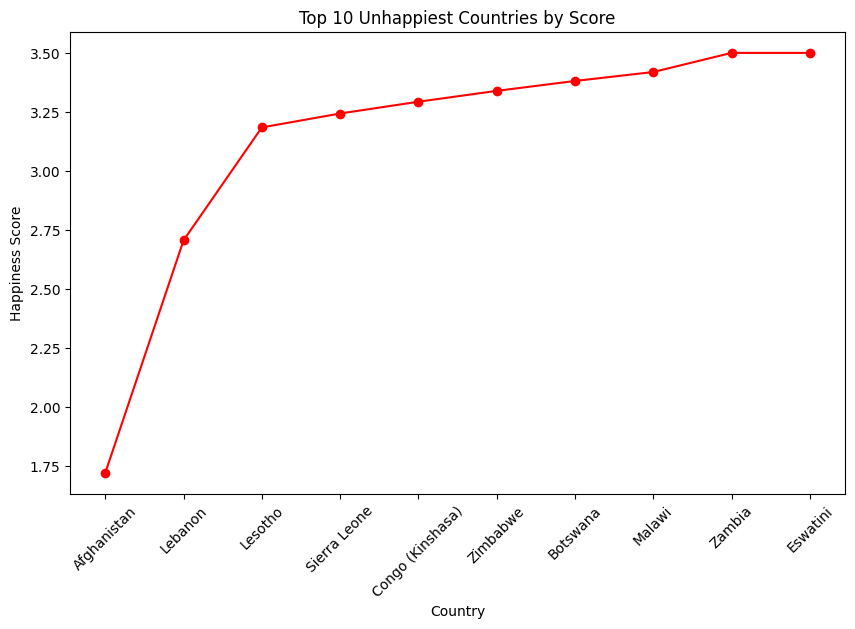

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

lol=pd.read_csv("/content/drive/MyDrive/Copy of WHR-2024-5CS037.csv")

plt.figure(figsize=(10, 6))
top_10_unhappiest = lol.nsmallest(10, 'score')
plt.plot(top_10_unhappiest['Country name'], top_10_unhappiest['score'], marker='o', linestyle='-', color='red')
plt.title('Top 10 Unhappiest Countries by Score')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45)
plt.show()

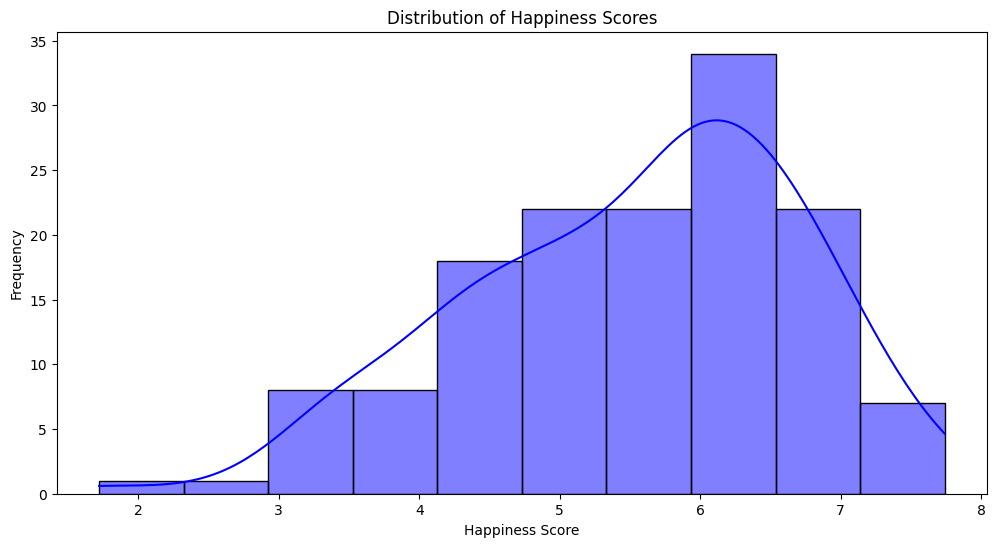

In [19]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

lol=pd.read_csv("/content/drive/MyDrive/Copy of WHR-2024-5CS037.csv")
# Histogram: Distribution of Scores
plt.figure(figsize=(12, 6))
sns.histplot(lol['score'], kde=True, color='blue')
plt.title('Distribution of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()

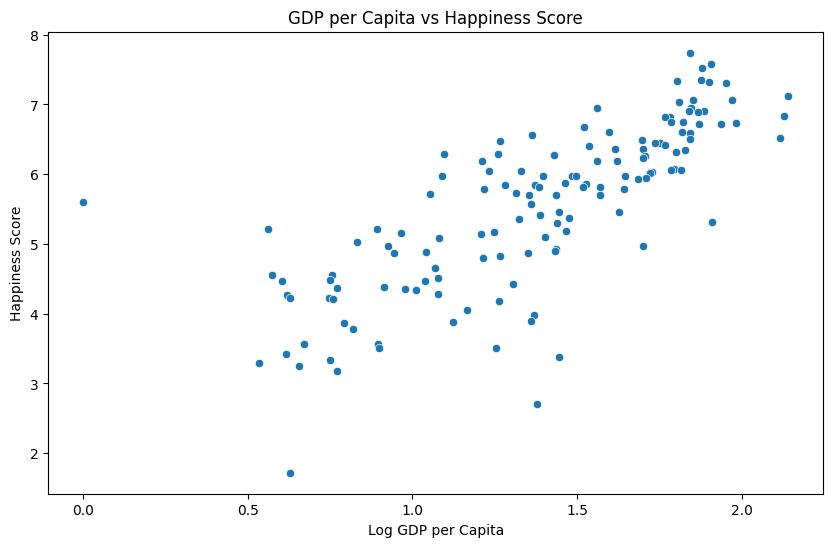

In [21]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
lol=pd.read_csv("/content/drive/MyDrive/Copy of WHR-2024-5CS037.csv")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=lol, )
plt.title('GDP per Capita vs Happiness Score')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')
plt.show()

In [25]:
# --- Problem 2: Advanced Data Exploration --- #

# Task 1: Setup Task - Preparing the South Asia Dataset
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]
south_asia_data = lol[lol['Country name'].isin(south_asian_countries)]
print("South Asia Dataset:")
print(south_asia_data)

# Save filtered South Asia dataset as a CSV
south_asia_data.to_csv('South_Asia_Happiness.csv', index=False)
print("\nSouth Asia dataset saved as 'South_Asia_Happiness.csv'.")

South Asia Dataset:
    Country name  score  Log GDP per capita  Social support  \
92         Nepal  5.158               0.965           0.990   
107     Pakistan  4.657               1.069           0.600   
125        India  4.054               1.166           0.653   
127    Sri Lanka  3.898               1.361           1.179   
128   Bangladesh  3.886               1.122           0.249   
142  Afghanistan  1.721               0.628           0.000   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
92                     0.443                         0.653       0.209   
107                    0.321                         0.542       0.144   
125                    0.417                         0.767       0.174   
127                    0.586                         0.583       0.144   
128                    0.513                         0.775       0.140   
142                    0.242                         0.000       0.091   

     Perceptions of

<ipython-input-29-3d5fdf8a0612>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia_data['Composite Score'] = (



South Asian countries ranked by Composite Score:
    Country name  Composite Score
127    Sri Lanka           1.0739
92         Nepal           0.8159
125        India           0.7874
107     Pakistan           0.7039
128   Bangladesh           0.6774
142  Afghanistan           0.3238


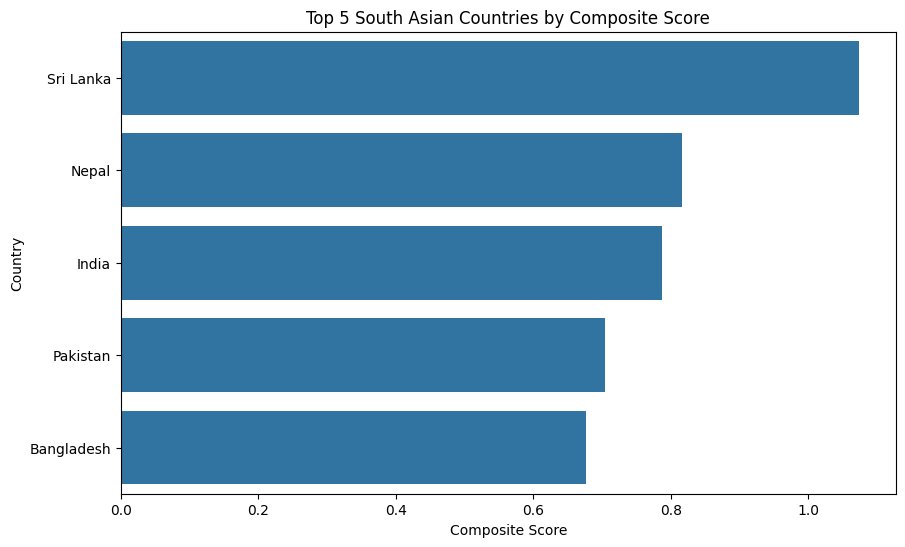

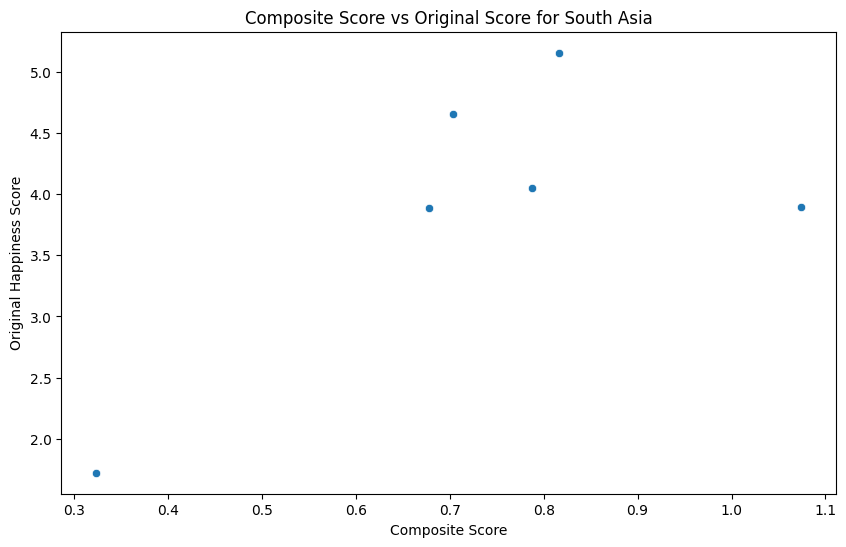

In [29]:
# Task 2: Composite Score Ranking
# Calculate Composite Score
south_asia_data['Composite Score'] = (
    0.4 * south_asia_data['Log GDP per capita'] +
    0.3 * south_asia_data['Social support'] +
    0.3 * south_asia_data['Healthy life expectancy']
)

# Rank by Composite Score
top_composite_score = south_asia_data.sort_values(by='Composite Score', ascending=False)
print("\nSouth Asian countries ranked by Composite Score:")
print(top_composite_score[['Country name', 'Composite Score']])

# Visualize top 5 countries by Composite Score
plt.figure(figsize=(10, 6))
sns.barplot(x='Composite Score', y='Country name', data=top_composite_score.head(5),)
plt.title('Top 5 South Asian Countries by Composite Score')
plt.xlabel('Composite Score')
plt.ylabel('Country')
plt.show()

# Discussion: Composite Score vs Original Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Composite Score', y='score', data=south_asia_data, )
plt.title('Composite Score vs Original Score for South Asia')
plt.xlabel('Composite Score')
plt.ylabel('Original Happiness Score')
plt.show()


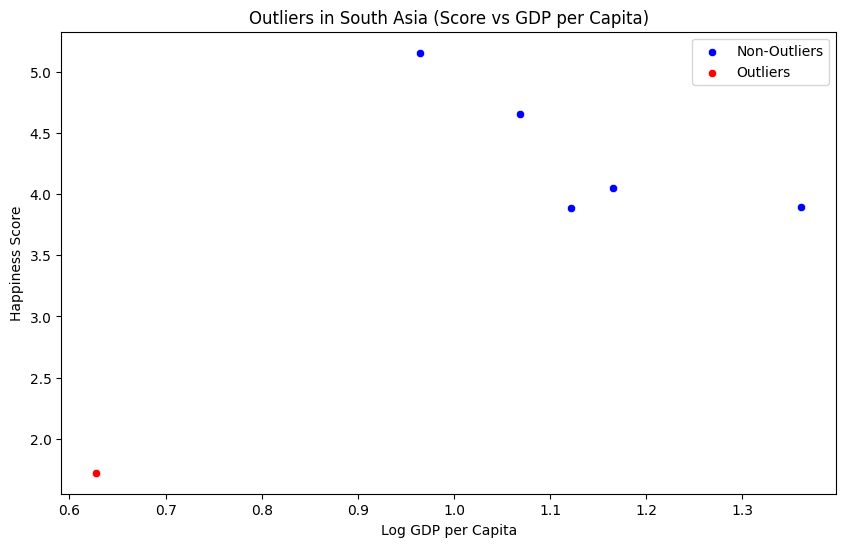


Outlier countries based on score:
    Country name  score  Log GDP per capita
142  Afghanistan  1.721               0.628


In [33]:
# Task 3: Outlier Detection
# Define outliers using 1.5 * IQR rule
q1 = south_asia_data['score'].quantile(0.25)
q3 = south_asia_data['score'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = south_asia_data[(south_asia_data['score'] < lower_bound) | (south_asia_data['score'] > upper_bound)]

# Scatter Plot: Highlighting outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=south_asia_data, color='blue', label='Non-Outliers')
sns.scatterplot(x='Log GDP per capita', y='score', data=outliers, color='red', label='Outliers')
plt.title('Outliers in South Asia (Score vs GDP per Capita)')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')
plt.legend()
plt.show()

print("\nOutlier countries based on score:")
print(outliers[['Country name', 'score', 'Log GDP per capita']])



Correlation of selected metrics with Happiness Score:
{'Freedom to make life choices': 0.8005185224163315, 'Generosity': 0.874512371253192}


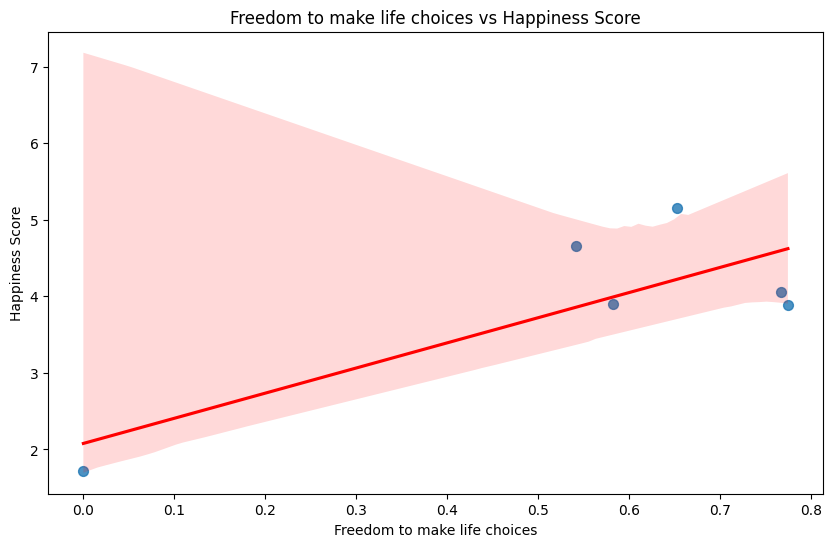

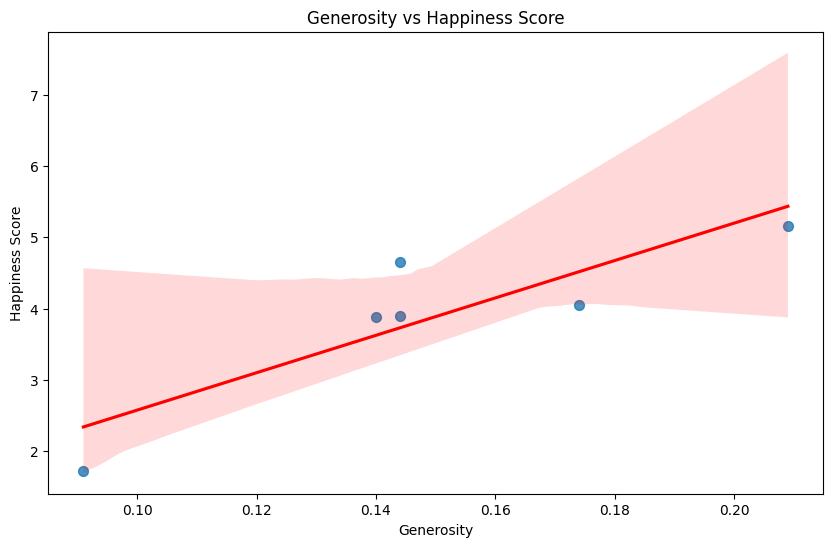

In [34]:
# Task 4: Exploring Trends Across Metrics
# Correlation with score
metrics = ['Freedom to make life choices', 'Generosity']
correlations = {metric: south_asia_data[metric].corr(south_asia_data['score']) for metric in metrics}
print("\nCorrelation of selected metrics with Happiness Score:")
print(correlations)

# Scatter plots with trendlines for selected metrics
for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.regplot(x=metric, y='score', data=south_asia_data, scatter_kws={'s': 50}, line_kws={'color': 'red'})
    plt.title(f'{metric} vs Happiness Score')
    plt.xlabel(metric)
    plt.ylabel('Happiness Score')
    plt.show()

<ipython-input-37-b520912d6ded>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia_data['GDP-Score Gap'] = south_asia_data['Log GDP per capita'] - south_asia_data['score']


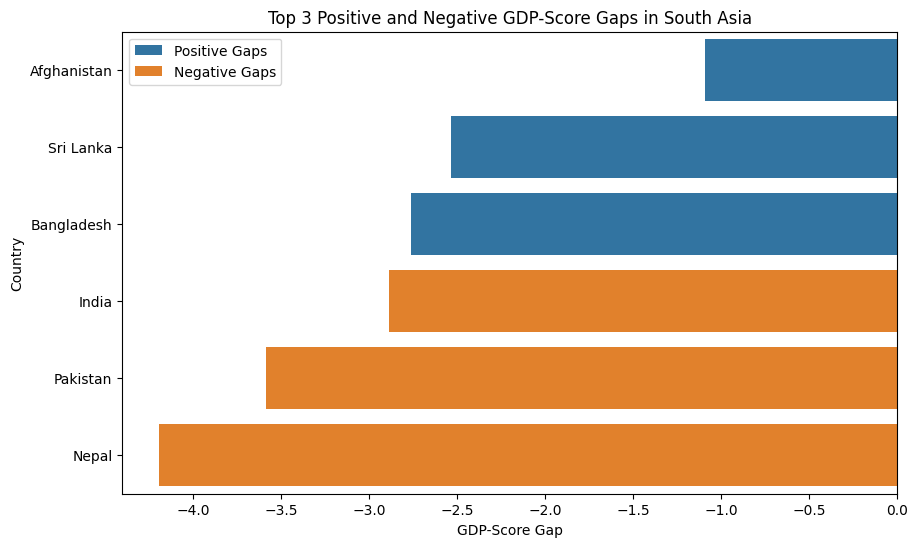


Top 3 positive and negative GDP-Score Gaps:
    Country name  GDP-Score Gap
142  Afghanistan         -1.093
127    Sri Lanka         -2.537
128   Bangladesh         -2.764
125        India         -2.888
107     Pakistan         -3.588
92         Nepal         -4.193


In [37]:
# Task 5: Gap Analysis
# GDP-Score Gap
south_asia_data['GDP-Score Gap'] = south_asia_data['Log GDP per capita'] - south_asia_data['score']

# Rank by GDP-Score Gap
gap_ranked = south_asia_data.sort_values(by='GDP-Score Gap', ascending=False)

# Visualize top 3 positive and negative gaps
plt.figure(figsize=(10, 6))
sns.barplot(x='GDP-Score Gap', y='Country name', data=gap_ranked.head(3), label='Positive Gaps')
sns.barplot(x='GDP-Score Gap', y='Country name', data=gap_ranked.tail(3), label='Negative Gaps')
plt.title('Top 3 Positive and Negative GDP-Score Gaps in South Asia')
plt.xlabel('GDP-Score Gap')
plt.ylabel('Country')
plt.legend()
plt.show()

print("\nTop 3 positive and negative GDP-Score Gaps:")
print(gap_ranked[['Country name', 'GDP-Score Gap']])


In [44]:
# --- Problem 3: Comparative Analysis --- #

# Task : Setup Task - Preparing the Middle Eastern Dataset
middle_east_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman",
    "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]
middle_east_data = lol[lol['Country name'].isin(middle_east_countries)]

# Save filtered Middle East dataset as a CSV
middle_east_data.to_csv('Middle_East_Happiness.csv', index=False)
print("\nMiddle East dataset saved as 'Middle_East_Happiness.csv'.")
print("Middle East Dataset:")
print(middle_east_data)


Middle East dataset saved as 'Middle_East_Happiness.csv'.
Middle East Dataset:
             Country name  score  Log GDP per capita  Social support  \
4                  Israel  7.341               1.803           1.513   
12                 Kuwait  6.951               1.845           1.364   
21   United Arab Emirates  6.733               1.983           1.164   
27           Saudi Arabia  6.594               1.842           1.361   
61                Bahrain  5.959                 NaN             NaN   
91                   Iraq  5.166               1.249           0.996   
99                   Iran  4.923               1.435           1.136   
124                Jordan  4.186               1.262           0.983   
132                 Yemen  3.561               0.671           1.281   
141               Lebanon  2.707               1.377           0.577   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
4                      0.740                         

In [47]:
# Task 1: Descriptive Statistics
# Calculate mean and standard deviation for both regions
south_asia_mean = south_asia_data['score'].mean()
south_asia_std = south_asia_data['score'].std()
middle_east_mean = middle_east_data['score'].mean()
middle_east_std = middle_east_data['score'].std()

print(f"\nSouth Asia - Mean: {south_asia_mean:}, Std Dev: {south_asia_std:}")
print(f"Middle East - Mean: {middle_east_mean:}, Std Dev: {middle_east_std:}")
print("Middle East has higher average happiness score")


South Asia - Mean: 3.895666666666667, Std Dev: 1.1770690152521504
Middle East - Mean: 5.412100000000001, Std Dev: 1.5662011684327144
Middle East has higher average happiness score


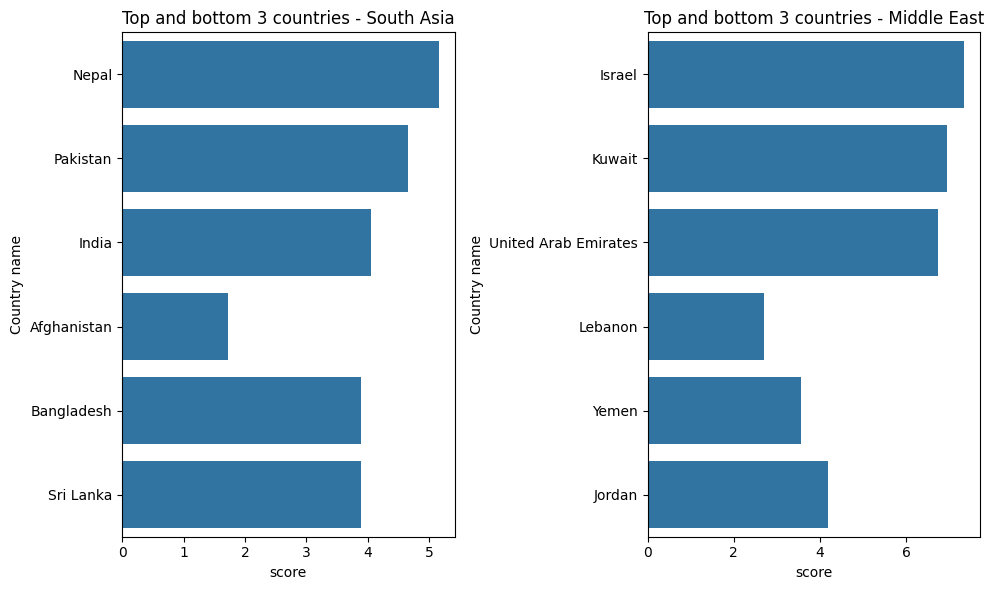

In [49]:
# Task 2: Top and Bottom Performers
# Identify top 3 and bottom 3 countries in each region
sAsia_top=south_asia_data.nlargest(3,"score")
midEast_top=middle_east_data.nlargest(3,"score")

sAsia_bottom=south_asia_data.nsmallest(3,"score")
midEast_bottom=middle_east_data.nsmallest(3,"score")

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.barplot(x="score",y="Country name",data=pd.concat([sAsia_top, sAsia_bottom]))
plt.title("Top and bottom 3 countries - South Asia")

plt.subplot(1,2,2)
sns.barplot(x="score",y="Country name",data=pd.concat([midEast_top, midEast_bottom]))
plt.title("Top and bottom 3 countries - Middle East")

plt.tight_layout()
plt.show()


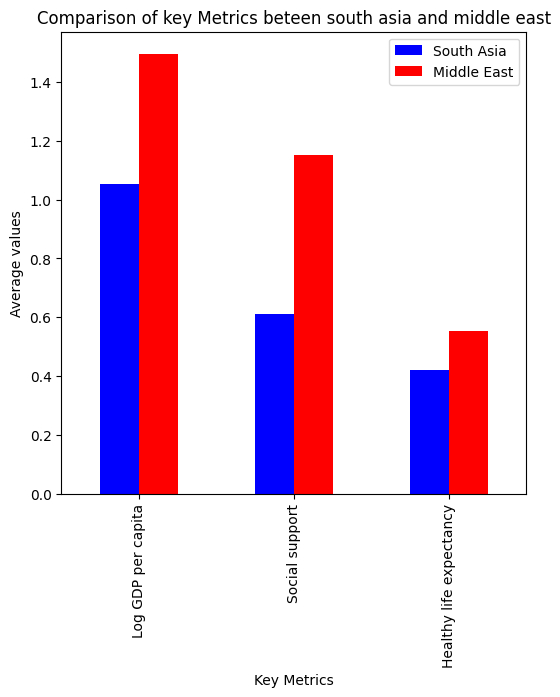

In [52]:
# Task 3: Metric Comparisons
# Compare key metrics between regions

comp=["Log GDP per capita", "Social support", "Healthy life expectancy"]

sAsia_mean_pick=south_asia_data[comp].mean()
midEast_mean_pick= middle_east_data[comp].mean()

comp_df=pd.DataFrame({"South Asia":sAsia_mean_pick,"Middle East":midEast_mean_pick})

comp_df.plot(kind="bar", figsize=(6,6), color=["blue","red"])
plt.title("Comparison of key Metrics beteen south asia and middle east")
plt.ylabel("Average values")
plt.xlabel("Key Metrics")
plt.show()

In [55]:
def comp(df,clmn):
  range=df[clmn].max()-df[clmn].min()
  cv=df[clmn].std()/df[clmn].mean()
  return range, cv

sAsian_range, sAsian_cv = comp(south_asia_data, 'score')
midEast_range, midEast_cv = comp(middle_east_data, 'score')

print(f"\nSouth Asia \n Range: {sAsian_range} \n CV: {sAsian_cv}")
print(f"\nMiddle East \n Range: {midEast_range} \n CV: {midEast_cv}")
print("South Asia has greater variability in happiness")


South Asia 
 Range: 3.4370000000000003 
 CV: 0.3021482883337427

Middle East 
 Range: 4.634 
 CV: 0.28938880812119405
South Asia has greater variability in happiness


South Asia Correlations:
Freedom to make life choices    0.800519
Generosity                      0.874512
score                           1.000000
Name: score, dtype: float64

Middle East Correlations:
Freedom to make life choices    0.863220
Generosity                      0.627524
score                           1.000000
Name: score, dtype: float64


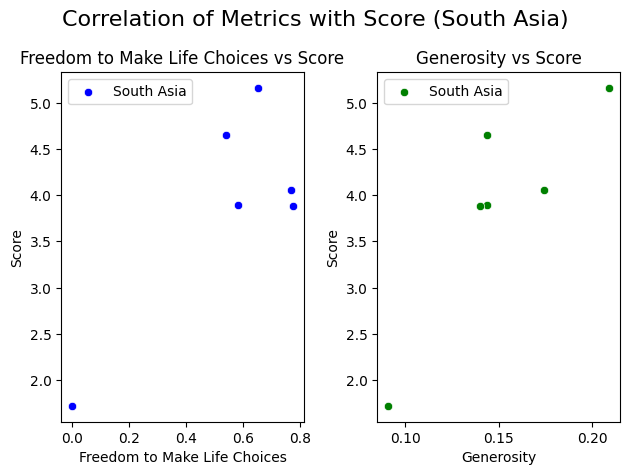

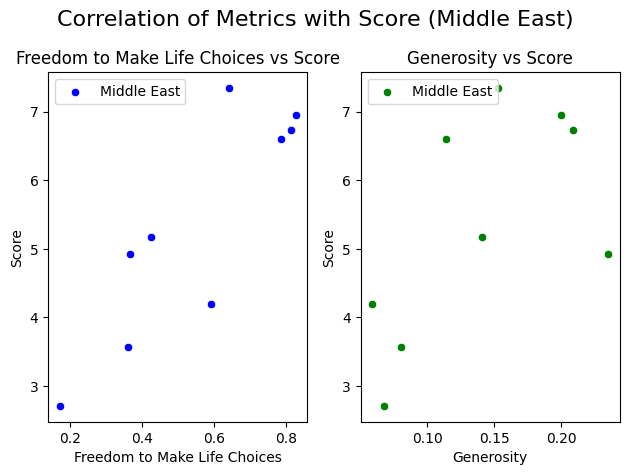

In [57]:
metrics = ['Freedom to make life choices', 'Generosity', 'score']

south_asia_corr = south_asia_data[metrics].corr()['score']
print("South Asia Correlations:")
print(south_asia_corr)

middle_east_corr = middle_east_data[metrics].corr()['score']
print("\nMiddle East Correlations:")
print(middle_east_corr)

plt.suptitle('Correlation of Metrics with Score (South Asia)', fontsize=16)

plt.subplot(1, 2, 1)
sns.scatterplot(data=south_asia_data, x='Freedom to make life choices', y='score', color='blue', label='South Asia')
plt.title('Freedom to Make Life Choices vs Score')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Score')

plt.subplot(1, 2, 2)
sns.scatterplot(data=south_asia_data, x='Generosity', y='score', color='green', label='South Asia')
plt.title('Generosity vs Score')
plt.xlabel('Generosity')
plt.ylabel('Score')

plt.tight_layout()
plt.show()

plt.suptitle('Correlation of Metrics with Score (Middle East)', fontsize=16)

plt.subplot(1, 2, 1)
sns.scatterplot(data=middle_east_data, x='Freedom to make life choices', y='score', color='blue', label='Middle East')
plt.title('Freedom to Make Life Choices vs Score')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Score')

plt.subplot(1, 2, 2)
sns.scatterplot(data=middle_east_data, x='Generosity', y='score', color='green', label='Middle East')
plt.title('Generosity vs Score')
plt.xlabel('Generosity')
plt.ylabel('Score')

plt.tight_layout()
plt.show()

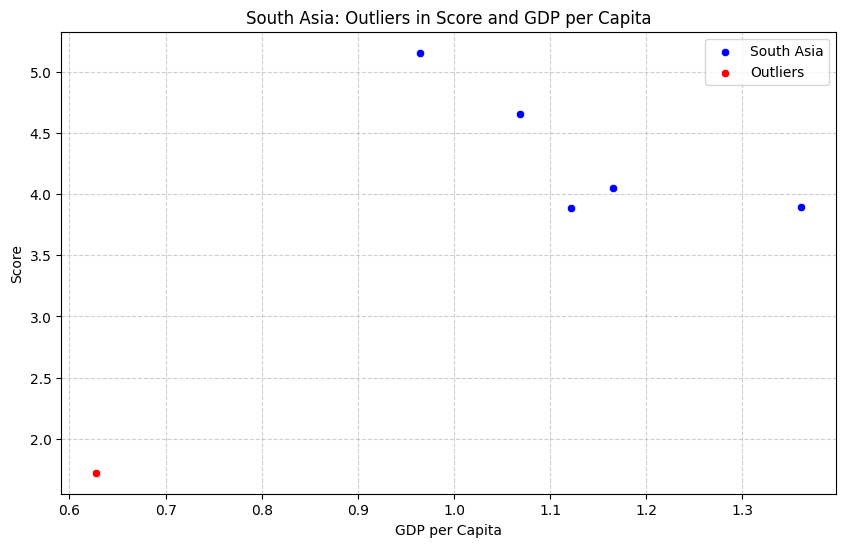

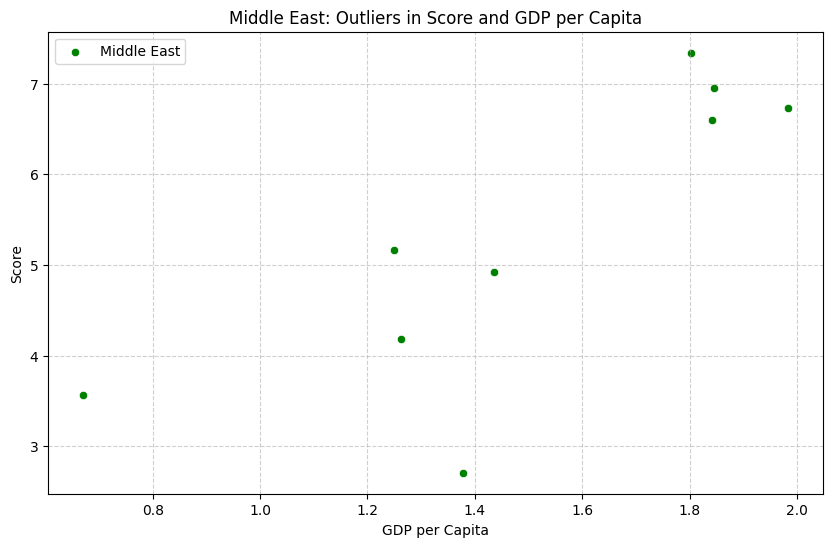

South Asia Outliers:
    Country name  score  Log GDP per capita
142  Afghanistan  1.721               0.628

Middle East Outliers:
Empty DataFrame
Columns: [Country name, score, Log GDP per capita]
Index: []


In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#Function to identify outliers using the 1.5 × IQR rule
def find_outliers(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

#Identify outliers for Score and GDP per Capita in both regions
south_asian_outliers = pd.concat([
    find_outliers(south_asia_data, 'score'),
    find_outliers(south_asia_data, 'Log GDP per capita')
]).drop_duplicates()

middle_east_outliers = pd.concat([
    find_outliers( middle_east_data, 'score'),
    find_outliers( middle_east_data, 'Log GDP per capita')
]).drop_duplicates()

#Scatter plots for South Asia
plt.figure(figsize=(10, 6))
sns.scatterplot(data=south_asia_data, x='Log GDP per capita', y='score', color='blue', label='South Asia')
sns.scatterplot(data=south_asian_outliers, x='Log GDP per capita', y='score', color='red', label='Outliers')
plt.title("South Asia: Outliers in Score and GDP per Capita")
plt.xlabel("GDP per Capita")
plt.ylabel("Score")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

#Scatter plots for Middle East
plt.figure(figsize=(10, 6))
sns.scatterplot(data=middle_east_data, x='Log GDP per capita', y='score', color='green', label='Middle East')
sns.scatterplot(data=middle_east_outliers, x='Log GDP per capita', y='score', color='red', label='Outliers')
plt.title("Middle East: Outliers in Score and GDP per Capita")
plt.xlabel("GDP per Capita")
plt.ylabel("Score")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

#Print outliers
print("South Asia Outliers:")
print(south_asian_outliers[['Country name', 'score', 'Log GDP per capita']])

print("\nMiddle East Outliers:")
print(middle_east_outliers[['Country name', 'score', 'Log GDP per capita']])

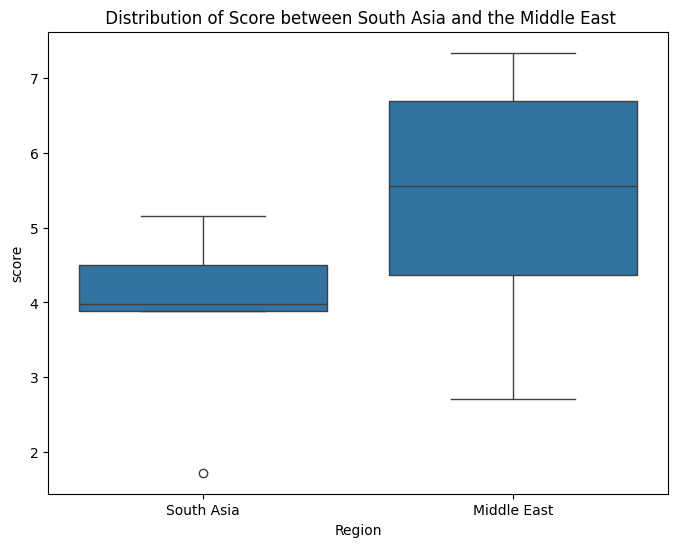

In [60]:

plt.figure(figsize=(8, 6))
sns.boxplot(x='Region', y='score',data=pd.concat([south_asia_data.assign(Region="South Asia"),middle_east_data.assign(Region="Middle East")]))
plt.title(" Distribution of Score between South Asia and the Middle East")
plt.show()